In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.4-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   -------------------- ----------------- 211.7/385.2 MB 773.0 kB/s eta 0:03:45
   -------------------- ----------------- 211.7/385.2 MB 774.8 kB/s eta 0:03:44
   -------------------- ----------------- 211.8/385.2 MB 772.1 kB/s eta 0:03:45
   -------------------- ----------------- 211.8/385.2 MB 772.1 kB/s eta 0:03:45
   -------------------- ----------------- 211.9/385.2 MB 769.3 kB/s eta 0:03:46
   -------------------- ----------------- 211.9/385.2 MB 768.5 kB/s eta 0:03:46
   -------------------- ----------------- 211.9/385.2 MB 764.8 kB/s eta 0:03:47
   -------------------- ----------------- 211.9/385.2 MB 766.7 kB/s eta 0:03:46
   -------------------- ----------------- 212.0/385.2 MB 764.0 kB/s eta 0:03:47
   -------------------- ----------------- 212.0/385.2 MB 763.0 kB/s eta 0:03:47
   -------------------- ----------------- 212.0/385.2 MB 763.0 kB/s eta 0:03:47
   -------------------- ----------------- 212.1/385.2 MB 760.4 kB/s eta 0:03:48
   -------------------- ---------------

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.3442 - loss: 1.7795 - val_accuracy: 0.5377 - val_loss: 1.2958
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5589 - loss: 1.2383 - val_accuracy: 0.5895 - val_loss: 1.1394
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.6298 - loss: 1.0536 - val_accuracy: 0.6393 - val_loss: 1.0154
313/313 - 2s - 8ms/step - accuracy: 0.6393 - loss: 1.0154

Test accuracy: 0.6392999887466431


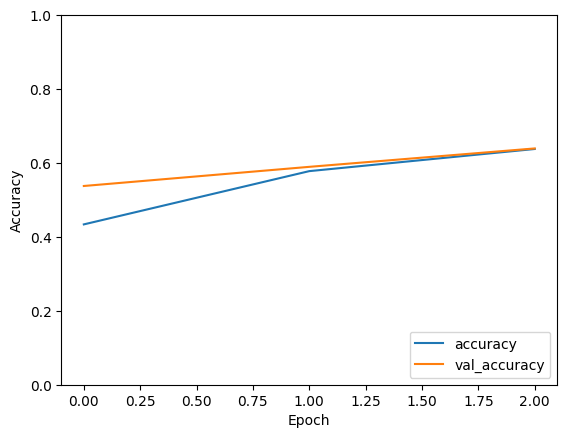

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the images to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=3, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
